<a href="https://colab.research.google.com/github/nagendrap418/data-mining/blob/main/company_data(Decision_Tree).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
data = pd.read_csv('Company_Data.csv')
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
data.shape

(400, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
label_encoder = preprocessing.LabelEncoder()
data['ShelveLoc']= label_encoder.fit_transform(data['ShelveLoc'])
data['Urban']= label_encoder.fit_transform(data['Urban'])
data['US']= label_encoder.fit_transform(data['US'])

In [7]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [8]:
x=data.iloc[:,0:6]
y=data['ShelveLoc']

In [9]:
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [10]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [11]:
data['ShelveLoc'].unique() 

array([0, 1, 2])

In [13]:
data.ShelveLoc.value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

In [14]:
colnames = list(data.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [15]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)          # Splitting data into training and testing data set

#Building Decision Tree Classifier using Entropy Criteria

In [17]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=3)

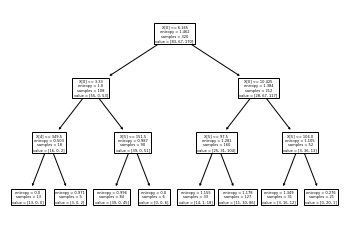

In [18]:
tree.plot_tree(model);             #PLot the decision tree

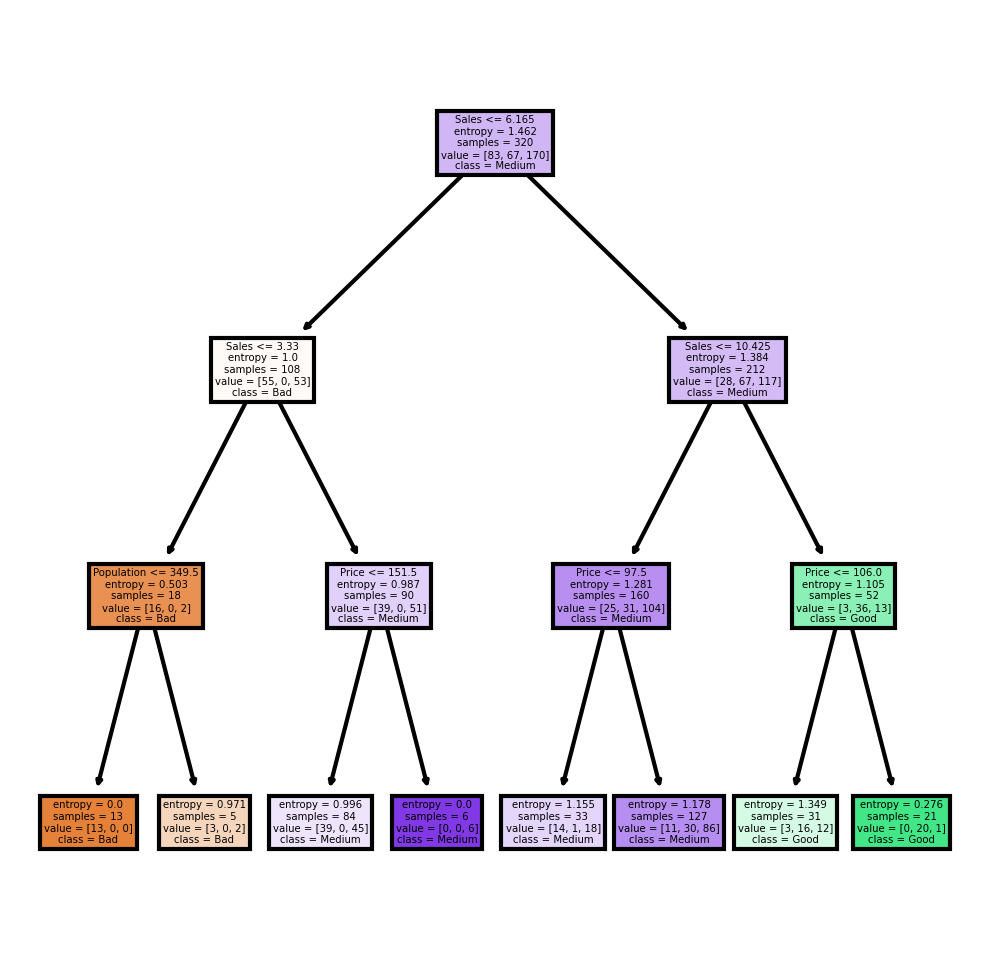

In [19]:
fn=['Sales',	'CompPrice', 	'Income',	'Advertising',	'Population',	'Price']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [20]:
model.feature_importances_ 

array([0.74692591, 0.        , 0.        , 0.        , 0.02920061,
       0.22387348])

In [21]:
feature_imp = pd.Series(model.feature_importances_,index=fn).sort_values(ascending=False) 
feature_imp

Sales          0.746926
Price          0.223873
Population     0.029201
CompPrice      0.000000
Income         0.000000
Advertising    0.000000
dtype: float64

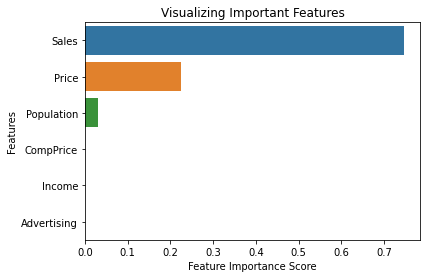

In [23]:
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [24]:
#Predicting on test data
preds = model.predict(x_test)                  # predicting on test data set 
pd.Series(preds).value_counts()                # getting the count of each category 

2    63
1    13
0     4
dtype: int64

In [25]:
preds

array([2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2])

In [26]:
pd.crosstab(y_test,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
ShelveLoc,,,
0,1,0,12
1,0,8,10
2,3,5,41


In [27]:
np.mean(preds==y_test)          #accuracy

0.625

#Building Decision Tree Classifier (CART) using Gini Criteria


In [28]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [29]:
model_gini.fit(x_train, y_train) 

DecisionTreeClassifier(max_depth=3)

In [30]:
pred=model.predict(x_test)
np.mean(preds==y_test)                       #Prediction and computing the accuracy 

0.625

In [31]:
model.feature_importances_ 

array([0.74692591, 0.        , 0.        , 0.        , 0.02920061,
       0.22387348])

#Decision Tree Regression

In [32]:
from sklearn.tree import DecisionTreeRegressor 

In [33]:
array = data.values
X = array[:,0:6]
y = array[:,3] 

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) 

In [35]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train) 

DecisionTreeRegressor()

In [36]:
model.score(X_test,y_test)           #accuracy

0.9894098230386015